<a href="https://colab.research.google.com/github/RubenMcCarty/Machine-Learning-with-Python/blob/master/5_ML_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML - Clasificación
## [M.Sc. Ruben Quispe](https://www.linkedin.com/in/ruben-quispe-l/)

En esta clase aprenderemos sobre la segunda tarea que podemos resolver con modelos de ML, después de la [regresión, y esta es la de **clasificación**. A diferencia de la regresión, en el que el objetivo era predecir el valor de una variable con respecto a diferentes caracterísitcas, en la clasificación el objetivo es el de asignar una clase, o etiqueta, a partir de las diferentes características. Como ejemplo, la clasificación de imágenes, se trata de asignar una etiqueta en función del valor de los pixeles. Vamos a ver diferentes modelos de ML que tenemos a nuestra disposición para esta tarea.

## Regresión Logística

Si bien este modelo lleva en el nombre **regresión**, realmente es un modelo de **clasificación**. Se llama así porque el modelo usado es el mismo que vimos en el post anterior para regresión lineal, aplicando una función **sigmoid** a la salida del modelo. Esta función convertirá el valor de la salida en un valor entre 0 y 1 que puede ser interpretado como una probabilidad. Aplicando un umbral a la salida podremos decidir si la muestra en cuestión pertenece a una clase o no (por ejemplo, si la probabilidad es mayor del 50%). Así pues, este modelo no servirá para la tarea de **clasificación binaria**.

$$
  \hat{y} = \sigma(w_0 + w_1 x_1 + w_2 x_2 + ... + w_n x_n)
$$

donde $\sigma(t) = \frac{1}{1 + e^{-t}}$ es la funcion sigmoidal.

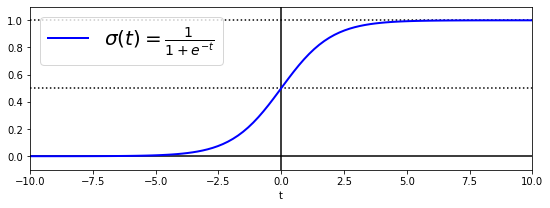

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

Vamos a ver un ejemplo aplicado a la clasificación de flores con el dataset [Iris](https://www.kaggle.com/arshid/iris-flower-dataset), cuyo objetivo es el de clasificar flores en 3 clases distintas en función del tamaño (largo y ancho) de sus pétalos y sépalos (4 características).

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

Para empezar de manera sencilla vamos a usar solo 1 característica (el ancho de los pétalos) y para la clasifiacición binaria nos quedaremos con solo una clase.

In [ ]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica, else 0

<ipython-input-3-c3494bf9af66>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica, else 0


Entrenando nuestro Modelo

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

In [ ]:
X_new = [[1.7], [1.5]]
y_new = log_reg.predict(X_new)
y_new

array([1, 0])

Podemos ver como una flor con un ancho de pétalo de 1.7 es clasificada como del tipo Iris Virginica, pero si el ancho es de 1.5 ya no. De la misma manera que en el caso de la regresión lineal, esta clasificación también es lineal.

/Users/rubencarthy/opt/anaconda3/lib/python3.8/site-packages/matplotlib/patches.py:1338: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  verts = np.dot(coords, M) + (x + dx, y + dy)


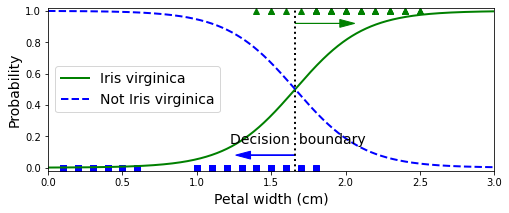

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

Como puedes ver es alrededor de los 1.6cm que el modelo decide asignar una clase u otra, sin embargo comete errores ya que esta frontera es difusa. Podemos ajustar el punto de corte en función de si queremos más o menos falsos positivos o falsos negativos, lo cual veremos en el siguiente post en detalle.

Veamos ahora el mismo ejemplo pero usando dos características.

In [ ]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

<ipython-input-9-138f69516b02>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)


LogisticRegression(C=10000000000, random_state=42)

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

/tmp/ipykernel_74240/2128389136.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


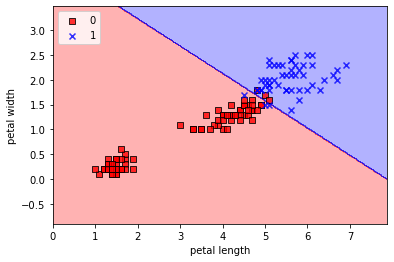

In [ ]:
plot_decision_regions(X, y, log_reg)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

Si visualizamos la frontera de decisión vemos de nuevo que nuestro modelo de regresión logísitca solo funcionará bien en el caso que nuestras muestras sean linealmente separables. De no ser así, tendremos errores ya que el modelo no es capaz de separar los datos mejor que con una línea recta. De nuevo, el proceso de *feature engineering* consistirá en trabajar estos atributos de los que disponemos, ya sea cambiando su representación o creando nuevas variables, que sí sean linealmente separables (o almenos con menos errores).

## Softmax Regression

El modelo anterior es muy útil a la hora de resolver la tarea de clasifiación binaria, sin embargo hay muchas ocasiones en las que queremos clasificar muestras en múltiples clases. Para ello podemos usar el modelo de *softmax regression*. Este modelo consiste en usar varios modelos de regresión lineal a la vez, aplicando una función *softmax* a la salida para transformar los valores en una distribución de probabilidad. Para saber a qué clase pertenece una muestra, simplemente escogeremos aquella con el valor más alto.

$$
  \hat{y} = \underset{k}{\arg\max} \ \ \sigma(w_0 + w_1 x_1 + w_2 x_2 + ... + w_n x_n)_k
$$

donde $\sigma(t)_k = \frac{e^{t_k}}{\sum^K_{k=1} e^{t_k}}$ es la funcion softmax.

In [ ]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [ ]:
softmax_reg.predict([[5, 2]]), softmax_reg.predict_proba([[5, 2]])

(array([2]), array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]]))

En este caso, para una flor con longitud y ancho de pétalo de 5 y 3 cm respectivamente, el modelo asigna la clase 2. Podemos ver las probabilidades asignadas a cada clase también (la clase asignada es aquella con probabilidad mayor).

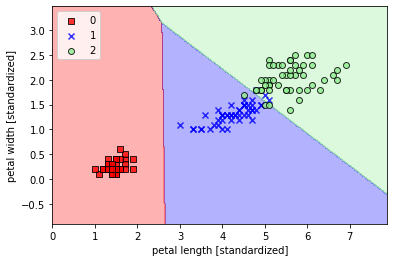

In [ ]:
plot_decision_regions(X, y, softmax_reg)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

Y, de nuevo, este modelo solo es capaz de separar los datos usando lineas, por lo que si estos no son linealmente separables tendremos errores y necesitaremos *feature engineering* o bien usar modelos más sofisticados que veremos en los siguientes posts.

## Descenso por gradiente

De la misma manera que para el caso de la regresión lineal, estos modelos necesitan tener todo el dataset en memoria para poder ser entrenados. En el caso en el que esto no sea posible, podemos recurrir al algoritmo de *gradient descent*.



In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

Vamos a separar unas cuantas muestras para validación.

In [ ]:
import numpy as np

X_with_bias = np.c_[np.ones([len(X), 1]), X] # add the bias term (x0 = 1)

test_ratio = 0.2
total_size = len(X)

test_size = int(total_size * test_ratio)
train_size = total_size - test_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

X_train.shape, X_test.shape

((120, 3), (30, 3))

Para poder entrenar nuestro modelo con el algoritmo de descenso por gradiente deberemos transformar nuestras etiquetas en probabilidades.

In [ ]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

a = np.array([0, 1, 2])
a_one_hot = np.array([[1., 0., 0.],
                      [0., 1., 0.],
                      [0., 0., 1.]])

assert np.allclose(a_one_hot,to_one_hot(a))

Y_train_one_hot = to_one_hot(y_train)
Y_test_one_hot = to_one_hot(y_test)

Ahora ya podemos entrenar nuestro modelo. Recuerda que para aplicar el algoritmo de descenso por gradiente necesitamos una función de pérdida y su derivada. Para el caso de la regresión logística podemos usar la función *log-loss*.

$$
  J(\mathbf{w}) = - \frac{1}{N} \sum^{N}_{j=1} \left[ y^{(j)} log(\hat{p}^{(j)}) + (1-y^{(j)})log(1-\hat{p}^{(j)})\right]
$$

$$
  \frac{\partial J}{\partial w_i} =  \frac{1}{N} \sum^{N}_{j=1} (\sigma(\mathbf{w} \cdot \mathbf{x}^{(i)}) - y^{(i)})x^{(j)}_i
$$

Mientras que si usamos la función *softmax* deberemos aplicar la función *cross-entropy*

$$
  J(\mathbf{w}) = - \frac{1}{N} \sum^N_{j=1} \sum^K_{k=1} y_k^{(j)} log(\hat{p}_k^{(j)})
$$

$$
  \frac{\partial J_k}{\partial \mathbf{w}} =  \frac{1}{N} \sum^{N}_{j=1} (\hat{p}_k^{(j)} - y_k^{(j)}) \mathbf{x}^{(j)}
$$

In [ ]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums
    
n_features = X_train.shape[1] # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train))   # == 3 (3 iris classes)

eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

w = np.random.randn(n_features, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(w)
    Y_proba = softmax(logits)
    loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m *X_train.T.dot(error)
    w = w - eta * gradients

0 1.3761160538085244
500 0.7827607305258518
1000 0.6487299080672452
1500 0.5692529796617362
2000 0.5162746246496878
2500 0.47779784588951235
3000 0.44810798342065683
3500 0.42418201967672003
4000 0.40427510729655813
4500 0.38730687705921196
5000 0.3725695074239355


In [ ]:
logits = X_test.dot(w)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.8333333333333334

Nuestro modelo alcanza una precisión del 96.7% en los datos de test, y podemos visualizar las forenteras de decisión que, como es de esperar, son también lineales.

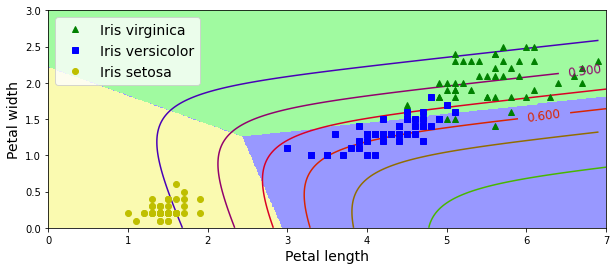

In [ ]:
import matplotlib.pyplot as plt 

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(w)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3])
plt.show()

## Resumen

En este clase hemos visto como podemos atacar el problema de la clasifiación con *Machine Learning*. Para ello podemos usar el modelo de **regresión logística** en el caso de la clasificación binaria o el modelo de **softmax regression** en el caso de la clasificación multiclase. En ambos casos, el modelo solo funcionará bien si nuestros datos son linealmente separables y caben en memoria. De no ser así, deberemos recurrir al *feature engineering* o al algoritmo de *gradient descent*, respectivamente. 